In [2]:
import pandas as pd

data = {
    "x": [5000,5570,4350,7900,6800,5400,6900,3900,4200,5780],
    "y": [160000,189380,139200,260700,217600,183600,234600,136500,138600,202300]}

df = pd.DataFrame(data)
df

,x,y
0,5000,160000
1,5570,189380
2,4350,139200
3,7900,260700
4,6800,217600
5,5400,183600
6,6900,234600
7,3900,136500
8,4200,138600
9,5780,202300


In [3]:
df['xy']= df['x']* df['y']
df

,x,y,xy
0,5000,160000,800000000
1,5570,189380,1054846600
2,4350,139200,605520000
3,7900,260700,2059530000
4,6800,217600,1479680000
5,5400,183600,991440000
6,6900,234600,1618740000
7,3900,136500,532350000
8,4200,138600,582120000
9,5780,202300,1169294000


In [4]:
df['x^2']=df['x']**2
df

,x,y,xy,x^2
0,5000,160000,800000000,25000000
1,5570,189380,1054846600,31024900
2,4350,139200,605520000,18922500
3,7900,260700,2059530000,62410000
4,6800,217600,1479680000,46240000
5,5400,183600,991440000,29160000
6,6900,234600,1618740000,47610000
7,3900,136500,532350000,15210000
8,4200,138600,582120000,17640000
9,5780,202300,1169294000,33408400


In [5]:
# Crear la fila con las sumas
suma = df.sum()

# Añadir al final del DataFrame
df.loc["Total"] = suma

df

,x,y,xy,x^2
0,5000,160000,800000000,25000000
1,5570,189380,1054846600,31024900
2,4350,139200,605520000,18922500
3,7900,260700,2059530000,62410000
4,6800,217600,1479680000,46240000
5,5400,183600,991440000,29160000
6,6900,234600,1618740000,47610000
7,3900,136500,532350000,15210000
8,4200,138600,582120000,17640000
9,5780,202300,1169294000,33408400


In [6]:
# Obtener los valores de la fila 'Total'
sum_x = df.loc["Total", "x"]
sum_y = df.loc["Total", "y"]
sum_xy = df.loc["Total", "xy"]
sum_x_cuadrada = df.loc["Total", "x^2"]

# Obtener el número de puntos de datos (excluyendo la fila 'Total')
n = len(df) - 1

# Calcular la pendiente (m) usando la fórmula de regresión lineal
# m = (n * Σ(xy) - Σx * Σy) / (n * Σ(x^2) - (Σx)^2)
numerator = (n * sum_xy) - (sum_x * sum_y)
denominator = (n * sum_x_cuadrada) - (sum_x**2)

m = numerator / denominator
print(f"La pendiente calculada es: {m}")


La pendiente calculada es: 32.819339789539896


In [7]:
b = sum_y / n - m * (sum_x / n)
print(f"La intersección calculada es: {b}")

La intersección calculada es: 3116.083974367386


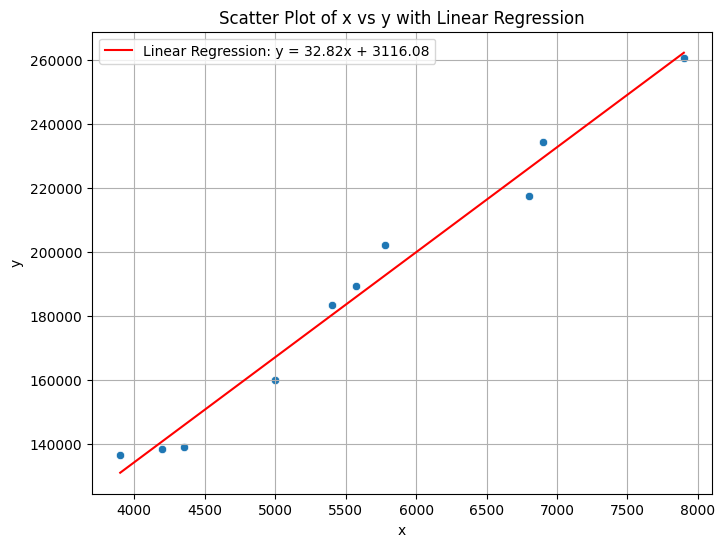

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

# Remove the 'Total' row before plotting
if 'Total' in df.index:
  df_plot = df.drop('Total')
else:
  df_plot = df.copy()


# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_plot, x='x', y='y')

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(df_plot['x'], df_plot['y'])
# Use the original x values for the regression line plot
x_line = df_plot['x']
y_line = intercept + slope * x_line

# Add regression line - create a range of x values for the line based on the original data
x_range = np.array([df_plot['x'].min(), df_plot['x'].max()])
y_range = intercept + slope * x_range

plt.plot(x_range, y_range, color='red', label=f'Linear Regression: y = {slope:.2f}x + {intercept:.2f}')


plt.title('Scatter Plot of x vs y with Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()